# Model performance comparison GPU vs CPU
In this notebook the performance results obtained during the inference will be compared for the CPU and GPU.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the results data

In [7]:
# Load the GPU and CPU results and combine them in a single dataframe
GPU_df = pd.read_pickle('inference_time_GPU.pkl')
CPU_df = pd.read_pickle('inference_time_CPU.pkl')
inference_time_df = pd.concat([GPU_df, CPU_df])

inference_time_df

,iteration,time_test,time_single,model,hardware
0,0,3438.353631,24.213758,CNN,GPU
1,1,159.799777,1.125351,CNN,GPU
2,2,197.602872,1.391570,CNN,GPU
3,3,130.862452,0.921567,CNN,GPU
4,4,165.366733,1.164554,CNN,GPU
5,5,160.316562,1.128990,CNN,GPU
6,6,158.894592,1.118976,CNN,GPU
7,7,229.384751,1.615386,CNN,GPU
8,8,214.918709,1.513512,CNN,GPU
9,9,101.850760,0.717259,CNN,GPU


## Results without the first inference

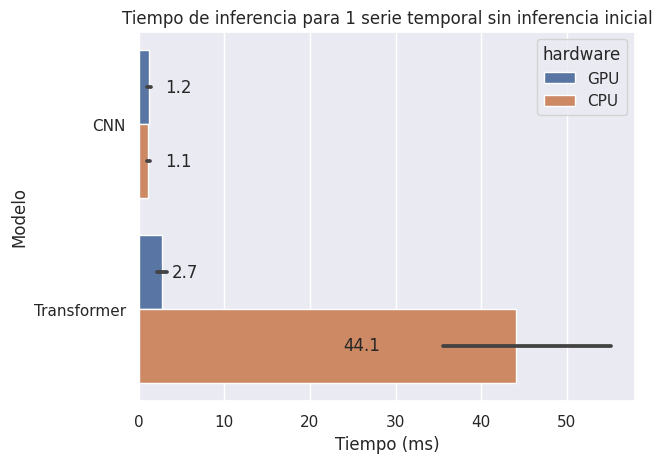

In [22]:
# Barplot for a single series
ax = sns.barplot(data=inference_time_df[inference_time_df['iteration']!=0], y='model', x='time_single', hue='hardware')
# Labels
plt.title('Tiempo de inferencia para 1 serie temporal sin inferencia inicial')
plt.ylabel('Modelo')
plt.xlabel('Tiempo (ms)')

for container in ax.containers:
  ax.bar_label(container, fmt='%.1f', padding=25, label_type='center')

# Save figure
plt.savefig('barplot inference time single without first iteration CPU vs GPU.png')